In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 17

In [16]:
models=['LinearRegression',
          'Lasso',
          'Ridge',
          'ElasticNet',
          'KNN',
          'SVM',
          'XGBoost',
          'RandomForest',
          'NeuralNetwork']

CV_results = {}
print('Attempting to load CV Results...')
for model in models:
    print('Reading {} CV Results...'.format(model))
    CVResults_df = pd.read_csv(str('output/'+model+'CVResults.csv'),index_col='Unnamed: 0')
    preds_df = pd.read_csv(str('output/'+model+'Predictions.csv'),index_col='id')
    CV_results[model] = [CVResults_df.loc['rmse','mean'], CVResults_df.loc['R2','mean'], 
                         CVResults_df.loc['expl_var','mean'],CVResults_df.loc['mae','mean'],CVResults_df.loc['mse','mean']]

Attempting to load CV Results...
Reading LinearRegression CV Results...
Reading Lasso CV Results...
Reading Ridge CV Results...
Reading ElasticNet CV Results...
Reading KNN CV Results...
Reading SVM CV Results...
Reading XGBoost CV Results...
Reading RandomForest CV Results...
Reading NeuralNetwork CV Results...


In [17]:
cv_df = pd.DataFrame(CV_results).T
cv_df.columns = ['rmse','R2','expl_var','mae','mse']
cv_df = cv_df.drop('mse',axis=1)

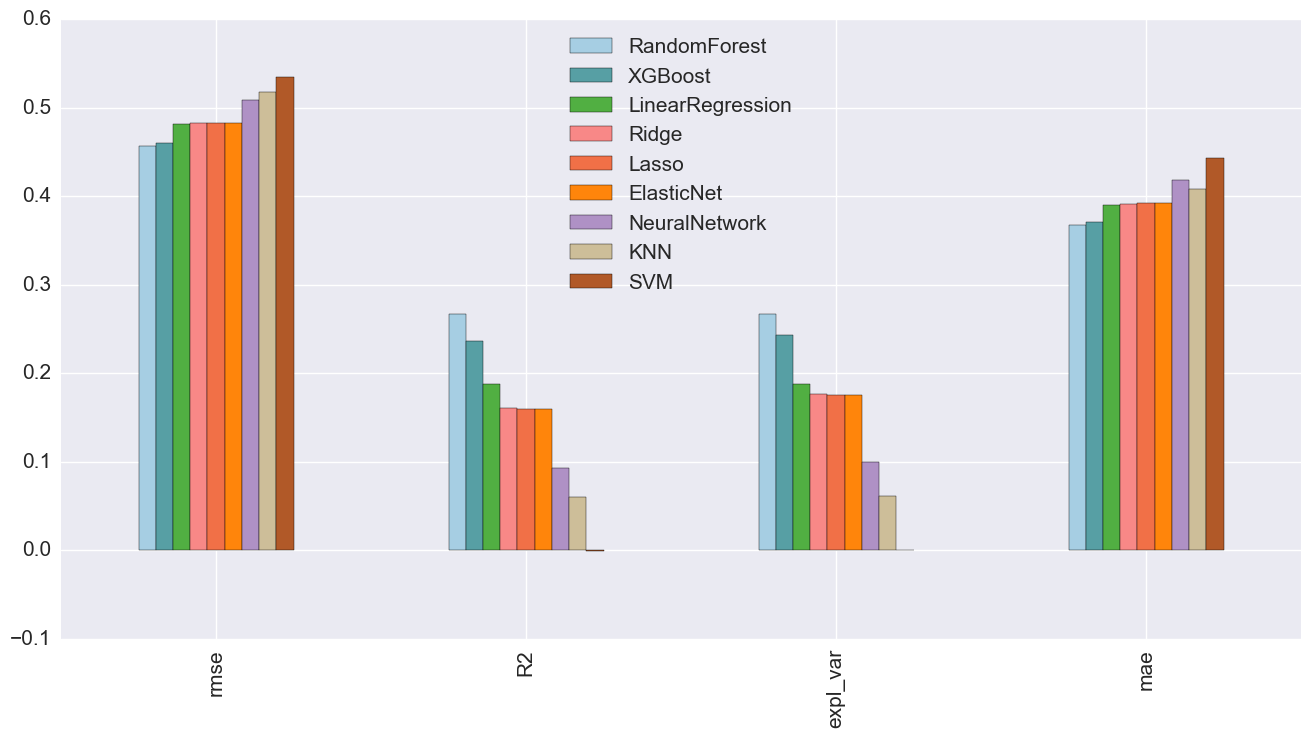

In [18]:
order=['RandomForest','XGBoost','LinearRegression','Ridge','Lasso','ElasticNet','NeuralNetwork','KNN','SVM']
ordered_plot = cv_df.ix[order]
ax = ordered_plot.T.plot(kind='bar',figsize=(16, 8), legend=True, fontsize=15, colormap='Paired')
plt.show()
fig = ax.get_figure()
fig.savefig('output/models_vs_evals.png')